

# NYTimes CA/NY Plots


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'

df = pd.read_csv(url)

In [0]:
df.head(5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


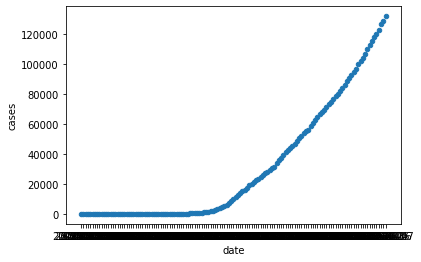

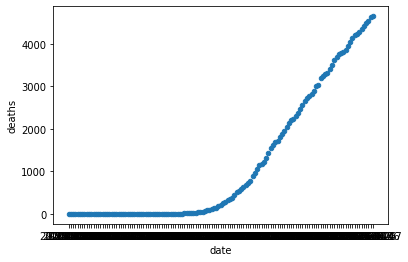

In [0]:
CA_df = df.loc[df['state'] == 'California']
CA_cases_plot = CA_df.plot.scatter(x = 'date', y = 'cases')
CA_deaths_plot = CA_df.plot.scatter(x = 'date', y = 'deaths')

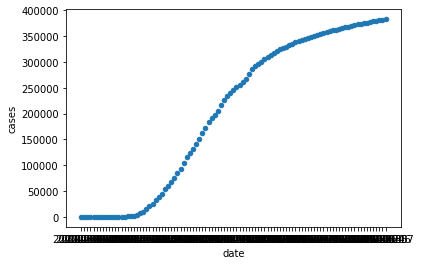

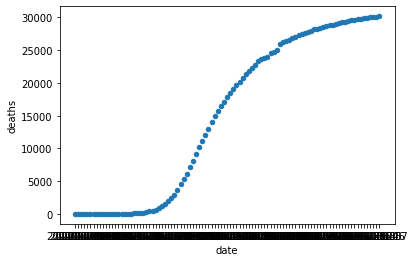

In [0]:
NY_df = df.loc[df['state'] == 'New York']
NY_cases_plot = NY_df.plot.scatter(x = 'date', y = 'cases')
NY_deaths_plot = NY_df.plot.scatter(x = 'date', y = 'deaths')

# Collect Data Files

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

# default plot size
plt.rcParams['figure.figsize'] = 10,12

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
# df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

In [0]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443,458,463,479
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256,278,283,310
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87,87,87,106
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563,3686,3807


In [0]:
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443,458,463,479
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256,278,283,310
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87,87,87,106
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563,3686,3807


## Change format of the time series data

In [0]:
df_confirmed = df_confirmed.melt(id_vars =["Province/State","Country","Lat","Long"],
                  var_name="Date",
                  value_name="Confirmed")
df_confirmed

,Province/State,Country,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
34575,NaN,Sao Tome and Principe,0.186360,6.613081,5/30/20,479
34576,NaN,Yemen,15.552727,48.516388,5/30/20,310
34577,NaN,Comoros,-11.645500,43.333300,5/30/20,106
34578,NaN,Tajikistan,38.861034,71.276093,5/30/20,3807


In [0]:
# convert to csv
df_confirmed.to_csv('clean_confirmed.csv')

In [0]:
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered= df_recovered.melt(id_vars =["Province/State","Country","Lat","Long"],
                  var_name="Date",
                  value_name="Recovered")
df_recovered

,Province/State,Country,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
32885,NaN,Sao Tome and Principe,0.186360,6.613081,5/30/20,68
32886,NaN,Yemen,15.552727,48.516388,5/30/20,13
32887,NaN,Comoros,-11.645500,43.333300,5/30/20,26
32888,NaN,Tajikistan,38.861034,71.276093,5/30/20,1865


In [0]:
df_recovered.to_csv('clean_recovered.csv')

In [0]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,5,5,5,5,5,6,7,7,7,7,7,8,8,8,8,8,8,11,12,12,12,12,12
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,2,2,2,2,4,5,5,7,7,8,9,10,12,12,15,18,20,20,28,30,33,33,39,42,44,49,53,57,65,77
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,2,3,5,8,12,12,20,20,21,21,23,29,33,36,39,41,41,41,44,44,44,46,46,47,47,47,47,47


In [0]:
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths= df_deaths.melt(id_vars =["Province/State","Country","Lat","Long"],
                  var_name="Date",
                  value_name="Deaths")
df_deaths

,Province/State,Country,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
34575,NaN,Sao Tome and Principe,0.186360,6.613081,5/30/20,12
34576,NaN,Yemen,15.552727,48.516388,5/30/20,77
34577,NaN,Comoros,-11.645500,43.333300,5/30/20,2
34578,NaN,Tajikistan,38.861034,71.276093,5/30/20,47


In [0]:
df_deaths.to_csv('clean_deaths.csv')

# Combine all clean data now

In [0]:
import pandas as pd
complete_data = pd.merge(left= df_confirmed, right=df_deaths, how='left')
complete_data = pd.merge(left=complete_data, right=df_recovered, how='left')

# fill NaN values with 0
complete_data['Recovered'] = complete_data['Recovered'].fillna(0)
complete_data['Confirmed'] = complete_data['Confirmed'].fillna(0)
complete_data['Deaths'] = complete_data['Deaths'].fillna(0)

In [0]:
complete_data.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


# Export Clean data to csv

In [0]:
complete_data.to_csv('covid_19_clean_complete.csv')

In [0]:
complete_data.head(50)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0.0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0.0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0.0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0.0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0.0


In [0]:
# df_global = pd.read_csv('/content/covid_19_clean_complete.csv')
# df_global.head()

## Filter global data for India Data Per Day

In [0]:
df_india_perday = complete_data.query('Country=="India"')
df_india_perday = df_india_perday.rename(columns={'Confirmed':'Total Cases'})
df_india_perday = df_india_perday.drop(['Deaths', 'Recovered','Lat','Long','Province/State','Country'], axis=1)
df_india_perday = df_india_perday.reset_index(drop=True)
df_india_perday.tail()

,Date,Total Cases
125,5/26/20,150793
126,5/27/20,158086
127,5/28/20,165386
128,5/29/20,173491
129,5/30/20,181827


## Add New Cases and days after surpassing 100 cases![alt text](https://)

In [0]:
new_cases = []
hundred_days = []
temp = 0
count = 0
for index, row in df_india_perday.iterrows():
  current_val = row['Total Cases']
  if current_val > temp:
    diff_val = current_val - temp
    temp = current_val
    new_cases.append(diff_val)
  else: # current == temp
    new_cases.append(0)
    temp = current_val

  if current_val >= 100:
    hundred_days.append(count)
    count+=1
  else:
    hundred_days.append(0)

In [0]:
df_india_perday['New Cases'] = new_cases
df_india_perday['Days after surpassing 100 cases'] = hundred_days
india_perday  = df_india_perday
india_perday

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
125,5/26/20,150793,5843,73
126,5/27/20,158086,7293,74
127,5/28/20,165386,7300,75
128,5/29/20,173491,8105,76


# 1) Analyze conditions in India

## Read the Dataset

-  All datasets have been taking from government official websites and the time series data has been scraped from John Hopkins University updated git

In [0]:
df_india = pd.read_excel('/content/Covid cases in India.xlsx',parse_dates=True, sheet_name='India-05-18')
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death
0,1,Andaman and Nicobar,33,33,0
1,2,Andhra Pradesh,3569,2289,60
2,3,Arunachal Pradesh,4,1,0
3,4,Assam,1185,163,4
4,5,Bihar,1185,1618,4
5,6,Chandigarh,289,189,4
6,7,Chhattisgarh,447,102,1
7,8,Dadra and Nagar Haveli,2,0,0
8,9,Daman and Diu,0,0,0
9,10,Delhi,18549,8075,416


In [0]:
# Coordinates of India States and Union Territories
india_coord = pd.read_excel('/content/Indian Coordinates.xlsx')

#day by day data of India, Korea, Italy and Wuhan 
# these dates are form March 22 (not using)
# india_perday = pd.read_excel('/content/per_day_cases.xlsx', parse_dates=True, sheet_name='India')
# italy_perday = pd.read_excel('/content/per_day_cases.xlsx', parse_dates=True, sheet_name='Italy')
# korea_perday = pd.read_excel('/content/per_day_cases.xlsx', parse_dates=True, sheet_name='Korea')
wuhan_perday = pd.read_excel('/content/per_day_cases.xlsx', parse_dates=True, sheet_name='Wuhan')

In [0]:
# Looked at total number of confirmed cases 
df_india['Total cases'] = df_india['Total Confirmed cases (Indian National)']
total_cases = df_india['Total cases']
print('Total number of confirmed COVID 19 cases in India up to May 30, 2020:\n',total_cases)

Total number of confirmed COVID 19 cases in India up to May 30, 2020:
 0        33
1      3569
2         4
3      1185
4      1185
5       289
6       447
7         2
8         0
9     18549
10       70
11    16343
12     1923
13      313
14     2341
15      563
16     2922
17     1208
18       74
19        0
20    65168
21       62
22       27
23        1
24     4444
25       36
26     1819
27       51
28     2233
29     8617
30        1
31    21184
32     2499
33      268
34     7445
35      749
36     5130
Name: Total cases, dtype: int64


In [0]:
# highlight dataframe
df_india.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death,Total cases
0,1,Andaman and Nicobar,33,33,0,33
1,2,Andhra Pradesh,3569,2289,60,3569
2,3,Arunachal Pradesh,4,1,0,4
3,4,Assam,1185,163,4,1185
4,5,Bihar,1185,1618,4,1185
5,6,Chandigarh,289,189,4,289
6,7,Chhattisgarh,447,102,1,447
7,8,Dadra and Nagar Haveli,2,0,0,2
8,9,Daman and Diu,0,0,0,0
9,10,Delhi,18549,8075,416,18549


## Number of Active COVID-19 cases in affected State/Union Terrritories

In [0]:
df_india['Total Active'] = df_india['Total cases'] - (df_india['Death']+df_india['Cured'])
total_active = df_india['Total Active'].sum()
print("Total number of active Cases in India (as of May 30):",  total_active)

# group states by total active
total_active_cases = df_india.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
total_active_cases.style.background_gradient(cmap='Reds')

Total number of active Cases in India (as of May 30): 75175


,Total Active
Name of State / UT,
Maharashtra,34890
Delhi,10058
Tamil Nadu,9024
Gujarat,6106
West Bengal,2851
Uttar Pradesh,2834
Rajasthan,2685
Karnataka,1877
Jammu and Kashmir,1405


## Show spread geographically

In [0]:
# Use folium for a zoomable map

df_india_full = pd.merge(india_coord,df_india, on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=5,tiles='Stamenterrain')

# size of circles depend on value which is the number of cases
for lat, lon, value, name in zip(df_india_full['Latitude'],  df_india_full['Longitude'], df_india_full['Total cases'],  df_india_full['Name of State / UT']):
  folium.CircleMarker([lat, lon], radius=value*(1/500), popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Confirmed vs Recovered

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



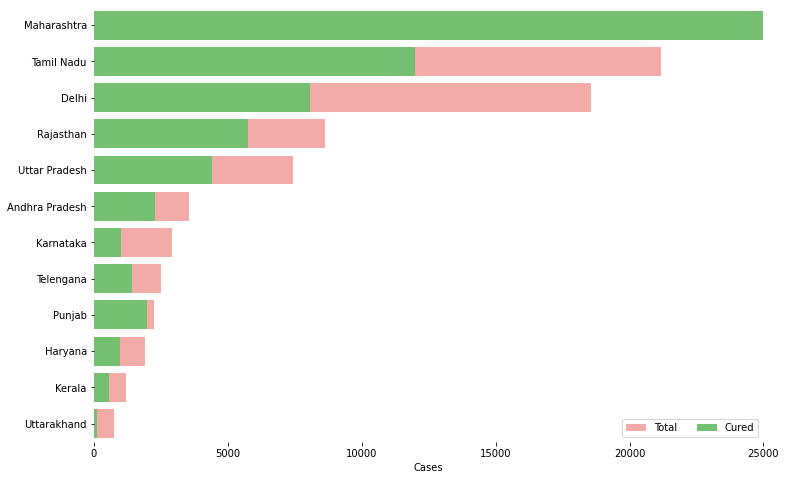

In [0]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
dataval = df_india_full[['Name of State / UT','Total cases','Cured','Death']]
 
dataval.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=dataval,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=dataval, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 25000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

# How are the coronavirus trends?

In [0]:
import plotly
plotly.io.renderers.default = 'colab'

In [0]:
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x = india_perday['Date'], y = india_perday['Total Cases'], mode = 'lines+markers', name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-10 cases reported daily in India
import plotly.express as px
fig = px.bar(india_perday, x='Date', y='New Cases', barmode='group', height=400)
fig.update_layout(title_text='COVID-19 Cases in India on daily basis', plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# Cumulative cases in India, Italy, S.Korea, and Wuhan

In [0]:
india_perday = india_perday[50:129]
print(india_perday)
fig = px.bar(india_perday, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


        Date  Total Cases  New Cases  Days after surpassing 100 cases
50   3/12/20           73         11                                0
51   3/13/20           82          9                                0
52   3/14/20          102         20                                0
53   3/15/20          113         11                                1
54   3/16/20          119          6                                2
..       ...          ...        ...                              ...
124  5/25/20       144950       6414                               72
125  5/26/20       150793       5843                               73
126  5/27/20       158086       7293                               74
127  5/28/20       165386       7300                               75
128  5/29/20       173491       8105                               76

[79 rows x 4 columns]


# Filter Global Data for Italy Data per day

In [0]:
italy_perday = complete_data.query('Country=="Italy"')
italy_perday = italy_perday.rename(columns={'Confirmed':'Total Cases'})
italy_perday = italy_perday.drop(['Deaths', 'Recovered','Lat','Long','Province/State','Country'], axis=1)
italy_perday = italy_perday.reset_index(drop=True)
italy_perday.tail()

,Date,Total Cases
125,5/26/20,230555
126,5/27/20,231139
127,5/28/20,231732
128,5/29/20,232248
129,5/30/20,232664


## Add New Cases and days after surpassing 100 cases for Italy



In [0]:
new_cases = []
hundred_days = []
temp = 0
count = 0
for index, row in italy_perday.iterrows():
  current_val = row['Total Cases']
  if current_val > temp:
    diff_val = current_val - temp
    temp = current_val
    new_cases.append(diff_val)
  else: # current == temp
    new_cases.append(0)
    temp = current_val

  if current_val >= 100:
    hundred_days.append(count)
    count+=1
  else:
    hundred_days.append(0)


italy_perday.tail()

,Date,Total Cases
125,5/26/20,230555
126,5/27/20,231139
127,5/28/20,231732
128,5/29/20,232248
129,5/30/20,232664


In [0]:
italy_perday['New Cases'] = new_cases
italy_perday['Days after surpassing 100 cases'] = hundred_days
italy_perday

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
125,5/26/20,230555,397,93
126,5/27/20,231139,584,94
127,5/28/20,231732,593,95
128,5/29/20,232248,516,96


In [0]:
print(italy_perday[30:129])
fig = px.bar(italy_perday, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

        Date  Total Cases  New Cases  Days after surpassing 100 cases
30   2/21/20           20         17                                0
31   2/22/20           62         42                                0
32   2/23/20          155         93                                0
33   2/24/20          229         74                                1
34   2/25/20          322         93                                2
..       ...          ...        ...                              ...
124  5/25/20       230158        300                               92
125  5/26/20       230555        397                               93
126  5/27/20       231139        584                               94
127  5/28/20       231732        593                               95
128  5/29/20       232248        516                               96

[99 rows x 4 columns]


# Filter Global Data for Korea Data per day

In [0]:
korea_perday = complete_data.query('Country=="Korea, South"')
korea_perday = korea_perday.rename(columns={'Confirmed':'Total Cases'})
korea_perday = korea_perday.drop(['Deaths', 'Recovered','Lat','Long','Province/State','Country'], axis=1)
korea_perday = korea_perday.reset_index(drop=True)
korea_perday.tail()

,Date,Total Cases
125,5/26/20,11265
126,5/27/20,11344
127,5/28/20,11402
128,5/29/20,11441
129,5/30/20,11468


## Add New Cases and days after surpassing 100 cases for Korea


In [0]:
new_cases = []
hundred_days = []
temp = 0
count = 0
for index, row in korea_perday.iterrows():
  current_val = row['Total Cases']
  if current_val > temp:
    diff_val = current_val - temp
    temp = current_val
    new_cases.append(diff_val)
  else: # current == temp
    new_cases.append(0)
    temp = current_val

  if current_val >= 100:
    hundred_days.append(count)
    count+=1
  else:
    hundred_days.append(0)


korea_perday.tail()

,Date,Total Cases
125,5/26/20,11265
126,5/27/20,11344
127,5/28/20,11402
128,5/29/20,11441
129,5/30/20,11468


In [0]:
korea_perday['New Cases'] = new_cases
korea_perday['Days after surpassing 100 cases'] = hundred_days
korea_perday

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,1/22/20,1,1,0
1,1/23/20,1,0,0
2,1/24/20,2,1,0
3,1/25/20,2,0,0
4,1/26/20,3,1,0
...,...,...,...,...
125,5/26/20,11265,40,96
126,5/27/20,11344,79,97
127,5/28/20,11402,58,98
128,5/29/20,11441,39,99


In [0]:
print(korea_perday[25:129])
fig = px.bar(korea_perday, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

        Date  Total Cases  New Cases  Days after surpassing 100 cases
25   2/16/20           29          1                                0
26   2/17/20           30          1                                0
27   2/18/20           31          1                                0
28   2/19/20           31          0                                0
29   2/20/20          104         73                                0
..       ...          ...        ...                              ...
124  5/25/20        11225         19                               95
125  5/26/20        11265         40                               96
126  5/27/20        11344         79                               97
127  5/28/20        11402         58                               98
128  5/29/20        11441         39                               99

[104 rows x 4 columns]


In [0]:
print(wuhan_perday)
fig = px.bar(wuhan_perday, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

         Date  Total Cases  New Cases
0  2020-01-22          444          0
1  2020-01-23          444          0
2  2020-01-24          549        105
3  2020-01-25          761        212
4  2020-01-26         1058        297
..        ...          ...        ...
58 2020-03-20        67800          0
59 2020-03-21        67800          0
60 2020-03-22        67800          0
61 2020-03-23        67800          0
62 2020-03-24        67801          1

[63 rows x 3 columns]


# Filter Global Data for Saudi Arabia Data per day

In [0]:
saudi_perday = complete_data.query('Country=="Saudi Arabia"')
saudi_perday = saudi_perday.rename(columns={'Confirmed':'Total Cases'})
saudi_perday = saudi_perday.drop(['Deaths', 'Recovered','Lat','Long','Province/State','Country'], axis=1)
saudi_perday = saudi_perday.reset_index(drop=True)
saudi_perday.tail()

,Date,Total Cases
125,5/26/20,76726
126,5/27/20,78541
127,5/28/20,80185
128,5/29/20,81766
129,5/30/20,83384


## Add New Cases and days after surpassing 100 cases for Saudi Arabia


In [0]:
new_cases = []
hundred_days = []
temp = 0
count = 0
for index, row in saudi_perday.iterrows():
  current_val = row['Total Cases']
  if current_val > temp:
    diff_val = current_val - temp
    temp = current_val
    new_cases.append(diff_val)
  else: # current == temp
    new_cases.append(0)
    temp = current_val

  if current_val >= 100:
    hundred_days.append(count)
    count+=1
  else:
    hundred_days.append(0)

In [0]:
saudi_perday['New Cases'] = new_cases
saudi_perday['Days after surpassing 100 cases'] = hundred_days

In [0]:
saudi_perday = saudi_perday[50:129]
print(saudi_perday)
fig = px.bar(saudi_perday, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Saudi Arabia', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

        Date  Total Cases  New Cases  Days after surpassing 100 cases
50   3/12/20           45         24                                0
51   3/13/20           86         41                                0
52   3/14/20          103         17                                0
53   3/15/20          103          0                                1
54   3/16/20          118         15                                2
..       ...          ...        ...                              ...
124  5/25/20        74795       2235                               72
125  5/26/20        76726       1931                               73
126  5/27/20        78541       1815                               74
127  5/28/20        80185       1644                               75
128  5/29/20        81766       1581                               76

[79 rows x 4 columns]


# Filter Global Data for United States per day

In [0]:
us_perday = complete_data.query('Country=="US"')
us_perday = us_perday.rename(columns={'Confirmed':'Total Cases'})
us_perday = us_perday.drop(['Deaths', 'Recovered','Lat','Long','Province/State','Country'], axis=1)
us_perday = us_perday.reset_index(drop=True)
us_perday.tail()

,Date,Total Cases
125,5/26/20,1680913
126,5/27/20,1699176
127,5/28/20,1721753
128,5/29/20,1746019
129,5/30/20,1770165


## Add New Cases and days after surpassing 100 cases for United States


In [0]:
new_cases = []
hundred_days = []
temp = 0
count = 0
for index, row in us_perday.iterrows():
  current_val = row['Total Cases']
  if current_val > temp:
    diff_val = current_val - temp
    temp = current_val
    new_cases.append(diff_val)
  else: # current == temp
    new_cases.append(0)
    temp = current_val

  if current_val >= 100:
    hundred_days.append(count)
    count+=1
  else:
    hundred_days.append(0)

In [0]:
us_perday['New Cases'] = new_cases
us_perday['Days after surpassing 100 cases'] = hundred_days
us_perday

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,1/22/20,1,1,0
1,1/23/20,1,0,0
2,1/24/20,2,1,0
3,1/25/20,2,0,0
4,1/26/20,5,3,0
...,...,...,...,...
125,5/26/20,1680913,18611,84
126,5/27/20,1699176,18263,85
127,5/28/20,1721753,22577,86
128,5/29/20,1746019,24266,87


In [0]:
us_perday = us_perday[40:120]
print(us_perday)
fig = px.bar(us_perday, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in United States', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

        Date  Total Cases  New Cases  Days after surpassing 100 cases
40    3/2/20           98         24                                0
41    3/3/20          118         20                                0
42    3/4/20          149         31                                1
43    3/5/20          219         70                                2
44    3/6/20          267         48                                3
..       ...          ...        ...                              ...
115  5/16/20      1467820      24996                               74
116  5/17/20      1486757      18937                               75
117  5/18/20      1508308      21551                               76
118  5/19/20      1528568      20260                               77
119  5/20/20      1551853      23285                               78

[80 rows x 4 columns]


In [0]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","India","Saudi Arabia"))

fig.add_trace(go.Bar(x=korea_perday['Date'], y=korea_perday['Total Cases'],
                    marker=dict(color=korea_perday['Total Cases'], coloraxis="coloraxis")),1, 1)

# fig.add_trace(go.Bar(x=italy_perday['Date'], y=italy_perday['Total Cases'],
#                     marker=dict(color=italy_perday['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=india_perday['Date'], y=india_perday['Total Cases'],
                    marker=dict(color=india_perday['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=saudi_perday['Date'], y=saudi_perday['Total Cases'], 
                     marker=dict(color=saudi_perday['Total Cases'], coloraxis="coloraxis")),2, 1)

#fig.add_trace(go.Bar(x=wuhan_perday['Date'], y=wuhan_perday['Total Cases'],
 #                   marker=dict(color=wuhan_perday['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Trend after crossing 100 cases

In [0]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'India', 'Saudi Arabia']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)', 'rgb(0,0,0)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=korea_perday['Days after surpassing 100 cases'], 
                 y=korea_perday['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=india_perday['Days after surpassing 100 cases'], 
                 y=india_perday['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=saudi_perday['Days after surpassing 100 cases'], 
                 y=saudi_perday['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

# Exploring World Wide Data

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4


In [0]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0


In [0]:
# convert to longer format
# grorupby is like a pivot function
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0.0
1,2020-01-22,Australia,New South Wales,0,0,0.0
2,2020-01-22,Australia,Northern Territory,0,0,0.0
3,2020-01-22,Australia,Queensland,0,0,0.0
4,2020-01-22,Australia,South Australia,0,0,0.0


In [0]:
# Check India's data
# query and pivot the table
# df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [0]:
# Overall worldwide Confirmed / Deaths / Recovered cases
# df.groupby('Date').sum().head()

# Visualizing: Worldwide NCOVID19 cases

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
125,2020-05-26,5589626
126,2020-05-27,5691790
127,2020-05-28,5808946
128,2020-05-29,5924275


In [0]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

# Forecasting Total Number of Cases Worldwide

# Using Prophet
- Prophet is an open souce software released by Facebook's Core Data Science team
- Forecasts time series data based no an additive model where non-linear trends are fit with yearly, weekly, and daily seasnoality, plus holiday effects
- Forecasts cann be tuned
- Fits model with Stan 
  - Stan is a state-of-the-art platform for statistical modeling and high-performaance statistical computation

In [0]:
from fbprophet import Prophet

## The input to Prophet is a dataframe with two columns: ds and y
- ds (datastamp_ column should be in a format expected by Pandas
  - YYY-MM-DD fo a date or YYYY-MM-DD HH:MM:SS for a timestamp
- the y column must be numeric and presents the measurement we wish to forecast

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
125,2020-05-26,5589626
126,2020-05-27,5691790
127,2020-05-28,5808946
128,2020-05-29,5924275
129,2020-05-30,6059017


# Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base Model)

- Generatinng a week ahead forecast of confirmed cases of NCOVID-19 using Prophet with 95% prediction interval by creating a base modoel with no tweaking of seasonality-related parameters annd additional regressors

In [0]:
# interval_width is the same as confidence
# 0.95 that is there is still scope for 5% error
# 95% sure our model will be correct
model = Prophet(interval_width=0.95)
model.fit(confirmed)
# forecast for period of 7 days
future = model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-06-02
133,2020-06-03
134,2020-06-04
135,2020-06-05
136,2020-06-06


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit.
- in-sample is data that you know at the time of model building and that you use to build that model
- The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
 # predicting the future with date, and upper and lower limit of y value 
# setting up tolerance for the
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,6.234952e+06,6.198152e+06,6.267297e+06
133,2020-06-03,6.327910e+06,6.285695e+06,6.366653e+06
134,2020-06-04,6.425093e+06,6.376140e+06,6.464927e+06
135,2020-06-05,6.523473e+06,6.459014e+06,6.578273e+06
136,2020-06-06,6.618909e+06,6.543939e+06,6.686324e+06


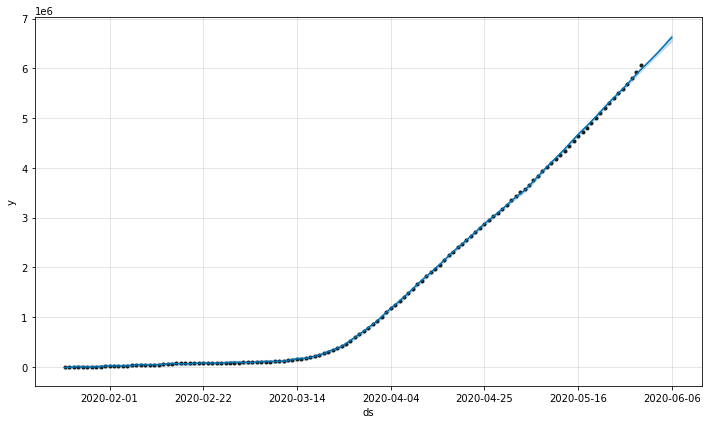

In [0]:
confirmed_forecast_plot = model.plot(forecast)

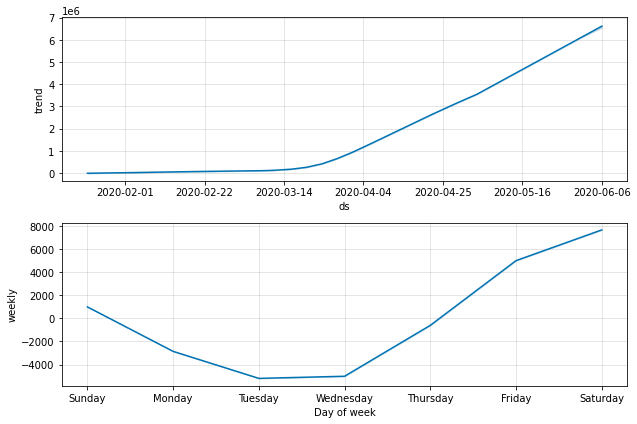

In [0]:
confirmed_forecast_plot = model.plot_components(forecast)

# Forecasting Worldwide Deaths Using Prophet

In [0]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds', 'y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

model_deaths = Prophet(interval_width=0.95)
model_deaths.fit(deaths)
future_deaths = model_deaths.make_future_dataframe(periods=7)

forecast_deaths = model_deaths.predict(future_deaths)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,383869.701008,381555.534985,386417.134203
133,2020-06-03,388733.899906,386128.840421,391800.555768
134,2020-06-04,393427.880959,390106.621402,397228.262371
135,2020-06-05,398181.196845,393909.603578,403205.200959
136,2020-06-06,402514.548122,397201.491330,407987.590064


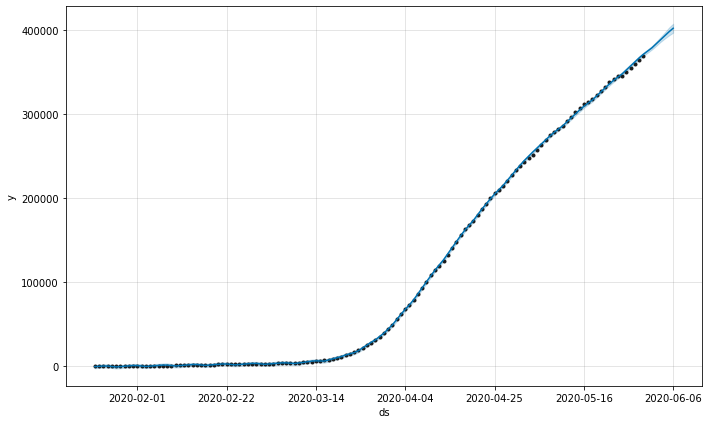

In [0]:
deaths_forecast_plot = model_deaths.plot(forecast_deaths)
# black dots are original values and blue line is the forecast 

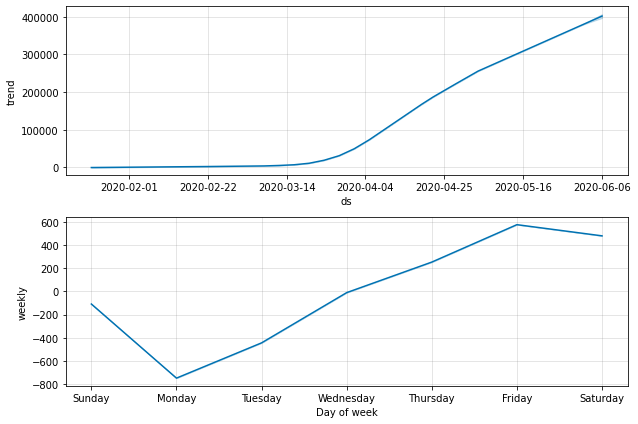

In [0]:
deaths_forecast_plot = model_deaths.plot_components(forecast_deaths)

# Forecasting Worldwide Recovered Cases with Prophet (Base Model)

In [0]:
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered.columns = ['ds', 'y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered

model_recov = Prophet(interval_width=0.95)
model_recov.fit(recovered)
future_recov = model_recov.make_future_dataframe(periods=7)
forecast_recov = model_recov.predict(future_recov)
forecast_recov[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,2.561120e+06,2.519676e+06,2.603371e+06
133,2020-06-03,2.614745e+06,2.572908e+06,2.656202e+06
134,2020-06-04,2.666946e+06,2.618827e+06,2.707800e+06
135,2020-06-05,2.722164e+06,2.674558e+06,2.767392e+06
136,2020-06-06,2.775033e+06,2.722981e+06,2.822195e+06


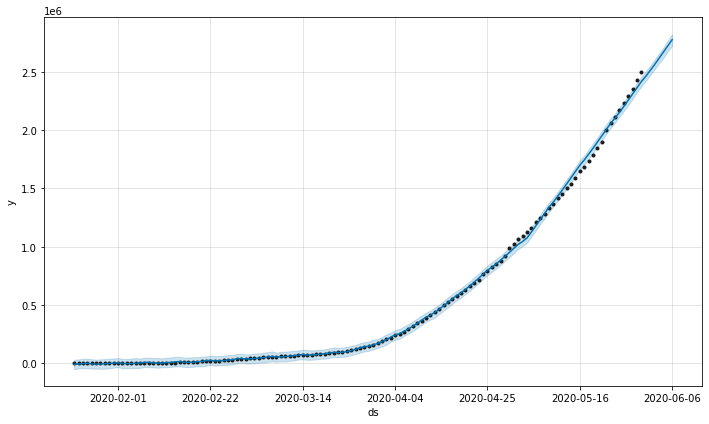

In [0]:
recovered_forecast_plot = model_recov.plot(forecast_recov)

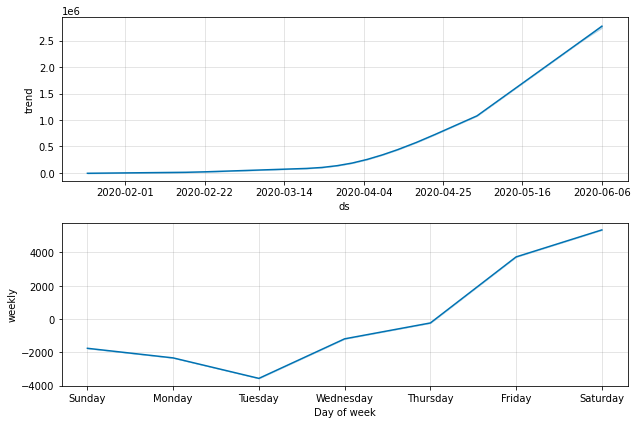

In [0]:
recovered_forecast_plot = model_recov.plot_components(forecast_recov)

# Prophet Models for Saudi Arabia![alt text](https://)

## Confirmed

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
df_saudi =  df.query('Country=="Saudi Arabia"')
df_saudi.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
192,NaN,Saudi Arabia,24.0,45.0,2020-01-22,0,0,0.0
458,NaN,Saudi Arabia,24.0,45.0,2020-01-23,0,0,0.0
724,NaN,Saudi Arabia,24.0,45.0,2020-01-24,0,0,0.0
990,NaN,Saudi Arabia,24.0,45.0,2020-01-25,0,0,0.0
1256,NaN,Saudi Arabia,24.0,45.0,2020-01-26,0,0,0.0


In [0]:
confirmed_saudi = df_saudi.groupby('Date').sum()['Confirmed'].reset_index()
deaths_saudi = df_saudi.groupby('Date').sum()['Deaths'].reset_index()
recovered_saudi = df_saudi.groupby('Date').sum()['Recovered'].reset_index()
deaths_saudi

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
125,2020-05-26,411
126,2020-05-27,425
127,2020-05-28,441
128,2020-05-29,458


In [0]:
confirmed_saudi.columns = ['ds', 'y']
confirmed_saudi['ds'] = pd.to_datetime(confirmed_saudi['ds'])
confirmed_saudi.tail()
confirmed_saudi

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
125,2020-05-26,76726
126,2020-05-27,78541
127,2020-05-28,80185
128,2020-05-29,81766


In [0]:
# interval_width is the same as confidence
# 0.95 that is there is still scope for 5% error
# 95% sure our model will be correct
model_saudi = Prophet(interval_width=0.95)
model_saudi.fit(confirmed_saudi)

# forecast for period of 7 days
future_saudi = model_saudi.make_future_dataframe(periods=360)
future_saudi.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
485,2021-05-21
486,2021-05-22
487,2021-05-23
488,2021-05-24
489,2021-05-25


In [0]:
 # predicting the future with date, and upper and lower limit of y value 
# setting up tolerance for the
forecast_saudi = model_saudi.predict(future_saudi)
forecast_saudi[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,870034.271281,451457.501277,1.273553e+06
486,2021-05-22,872257.436417,452233.369792,1.279020e+06
487,2021-05-23,874562.874459,451980.334566,1.282894e+06
488,2021-05-24,876815.707121,451751.069667,1.288028e+06
489,2021-05-25,878966.506102,451773.598481,1.291170e+06


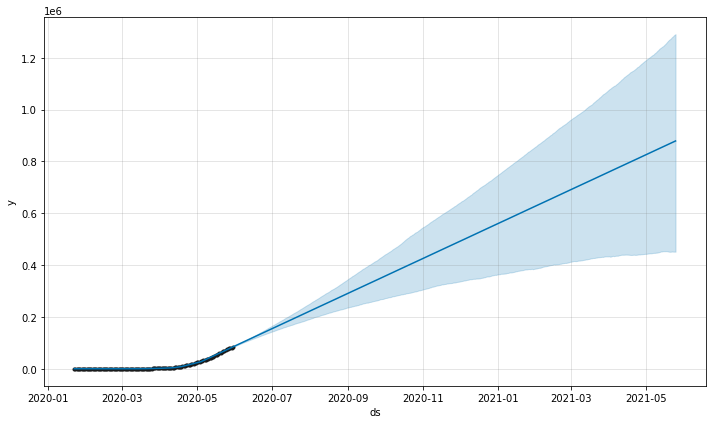

In [0]:
confirmed_forecast_plot = model_saudi.plot(forecast_saudi)

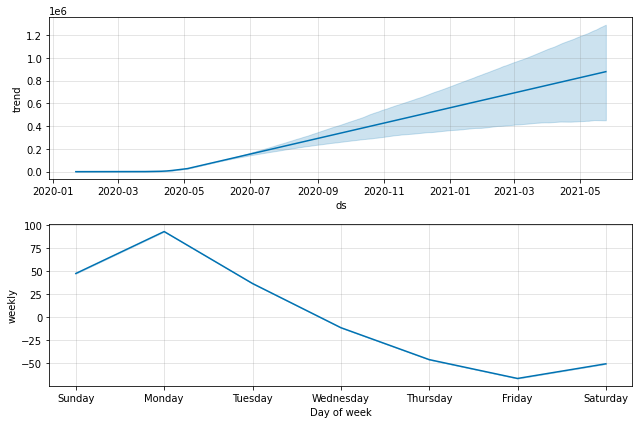

In [0]:
confirmed_forecast_plot = model_saudi.plot_components(forecast_saudi)

## Deaths

In [0]:
deaths_saudi.columns = ['ds', 'y']
deaths_saudi['ds'] = pd.to_datetime(deaths_saudi['ds'])
deaths_saudi.tail()
deaths_saudi

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
125,2020-05-26,411
126,2020-05-27,425
127,2020-05-28,441
128,2020-05-29,458


In [0]:
# interval_width is the same as confidence
# 0.95 that is there is still scope for 5% error
# 95% sure our model will be correct
model_saudi = Prophet(interval_width=0.95)
model_saudi.fit(deaths_saudi)

# forecast for period of 7 days
future_saudi = model_saudi.make_future_dataframe(periods=7)
future_saudi.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-06-02
133,2020-06-03
134,2020-06-04
135,2020-06-05
136,2020-06-06


In [0]:
 # predicting the future with date, and upper and lower limit of y value 
# setting up tolerance for the
forecast_saudi_death = model_saudi.predict(future_saudi)
forecast_saudi_death[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,483.943530,476.264051,491.604980
133,2020-06-03,494.253191,485.915996,501.940567
134,2020-06-04,504.912513,497.093918,513.395946
135,2020-06-05,515.501766,506.635678,523.907032
136,2020-06-06,526.876410,517.892027,536.622143


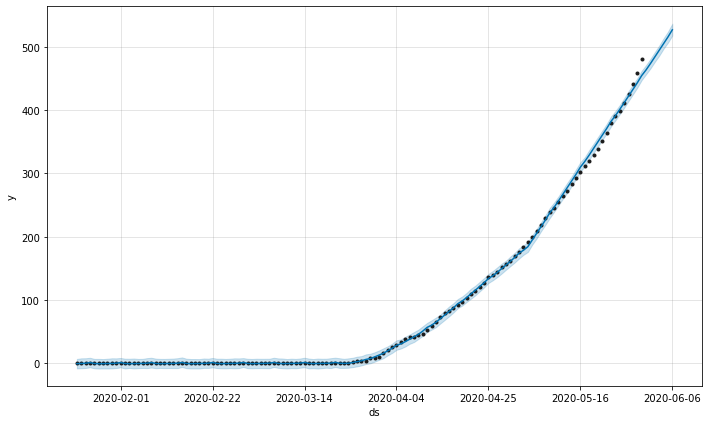

In [0]:
death_forecast_plot = model_saudi.plot(forecast_saudi_death)

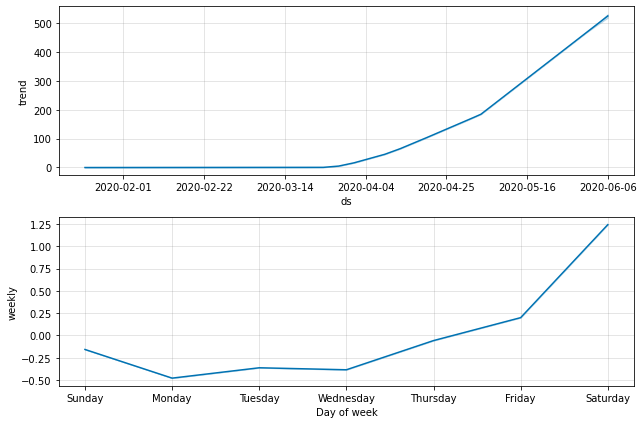

In [0]:
death_forecast_plot = model_saudi.plot_components(forecast_saudi_death)

## Recovered

In [0]:
recovered_saudi.columns = ['ds', 'y']
recovered_saudi['ds'] = pd.to_datetime(recovered_saudi['ds'])
recovered_saudi.tail()

,ds,y
125,2020-05-26,48450.0
126,2020-05-27,51022.0
127,2020-05-28,54553.0
128,2020-05-29,57013.0
129,2020-05-30,58883.0


In [0]:
# interval_width is the same as confidence
# 0.95 that is there is still scope for 5% error
# 95% sure our model will be correct
model_saudi = Prophet(interval_width=0.95)
model_saudi.fit(recovered_saudi)

# forecast for period of 7 days
future_saudi_recov= model_saudi.make_future_dataframe(periods=7)
future_saudi_recov.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-06-02
133,2020-06-03
134,2020-06-04
135,2020-06-05
136,2020-06-06


In [0]:
 # predicting the future with date, and upper and lower limit of y value 
# setting up tolerance for the
forecast_saudi_recov = model_saudi.predict(future_saudi_recov)
forecast_saudi_recov[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,61412.671699,59091.630022,63531.487493
133,2020-06-03,63476.300795,61475.262256,65804.256418
134,2020-06-04,65556.008766,63407.016176,67741.122730
135,2020-06-05,67696.746026,65462.685664,69967.883587
136,2020-06-06,69706.280205,67253.730852,72177.982087


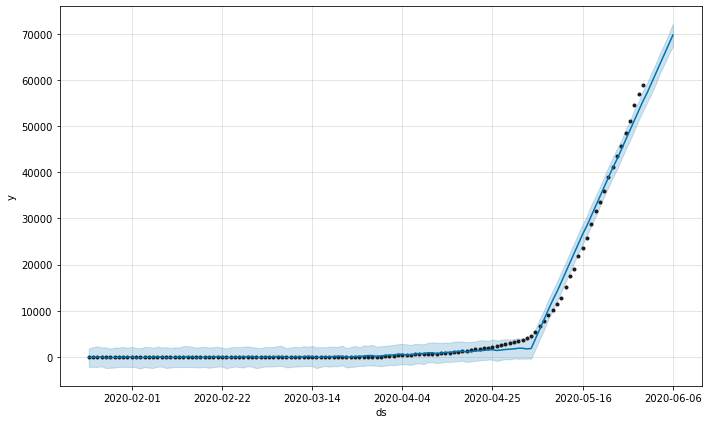

In [0]:
recovered_forecast_plot = model_saudi.plot(forecast_saudi_recov)

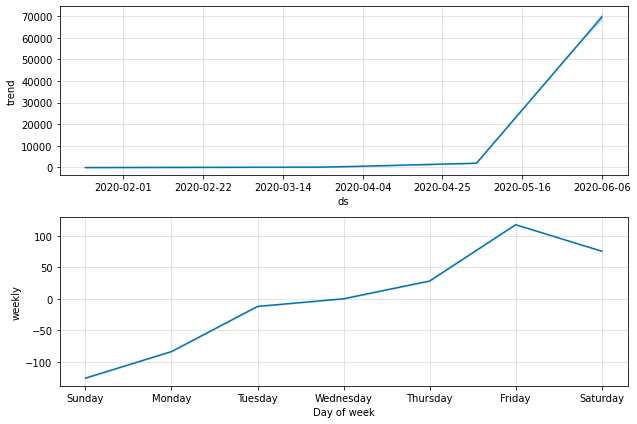

In [0]:
recovered_forecast_plot = model_saudi.plot_components(forecast_saudi_recov)

# Prophet models for India

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
df_india=  df.query('Country=="India"')
df_india.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
131,NaN,India,21.0,78.0,2020-01-22,0,0,0.0
397,NaN,India,21.0,78.0,2020-01-23,0,0,0.0
663,NaN,India,21.0,78.0,2020-01-24,0,0,0.0
929,NaN,India,21.0,78.0,2020-01-25,0,0,0.0
1195,NaN,India,21.0,78.0,2020-01-26,0,0,0.0


# Confirmed

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


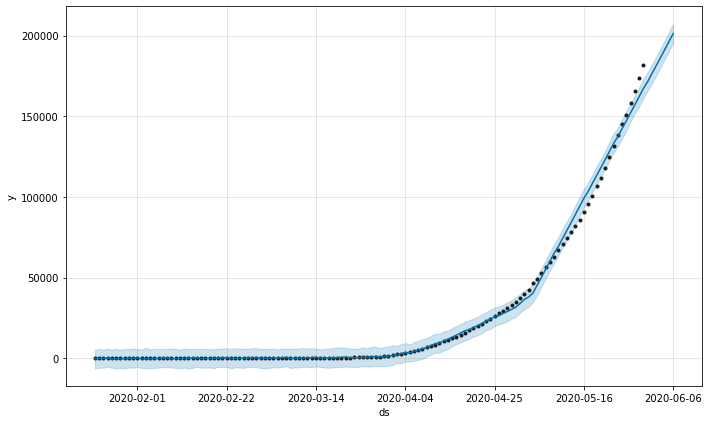

In [0]:
confirmed_india = df_india.groupby('Date').sum()['Confirmed'].reset_index()

confirmed_india.columns = ['ds', 'y']
confirmed_india['ds'] = pd.to_datetime(confirmed_india['ds'])

model_india = Prophet(interval_width=0.95)
model_india.fit(confirmed_india)

# forecast for period of 7 days
future_india = model_india.make_future_dataframe(periods=7)

forecast_india = model_india.predict(future_india)
forecast_india[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

confirmed_forecast_plot = model_india.plot(forecast_india)

# Deaths

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


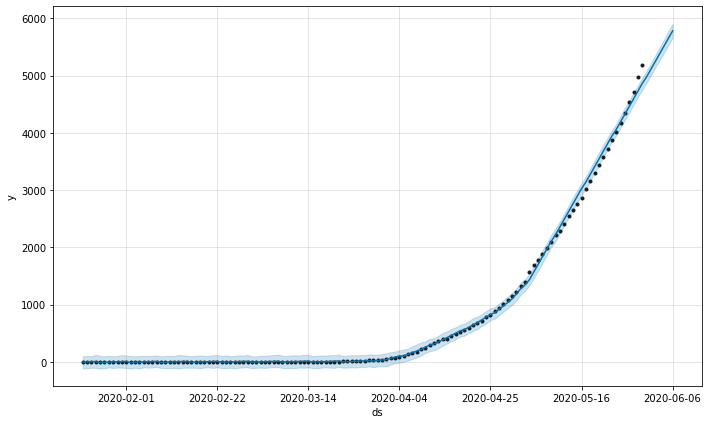

In [0]:
deaths_india = df_india.groupby('Date').sum()['Deaths'].reset_index()

deaths_india.columns = ['ds', 'y']
deaths_india['ds'] = pd.to_datetime(deaths_india['ds'])

model_india_deaths = Prophet(interval_width=0.95)
model_india_deaths.fit(deaths_india)

# forecast for period of 7 days
future_india_deaths = model_india_deaths.make_future_dataframe(periods=7)

forecast_india_deaths = model_india_deaths.predict(future_india_deaths)
forecast_india_deaths[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

deaths_forecast_plot = model_india_deaths.plot(forecast_india_deaths)

# Recovered

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


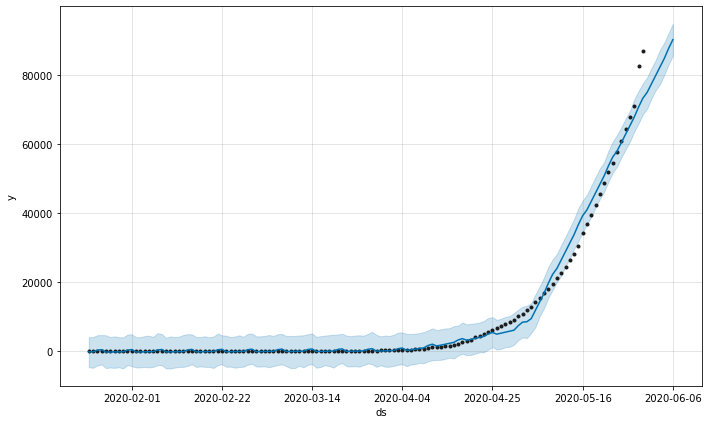

In [0]:
recov_india = df_india.groupby('Date').sum()['Recovered'].reset_index()

recov_india.columns = ['ds', 'y']
recov_india['ds'] = pd.to_datetime(recov_india['ds'])

model_india_recov = Prophet(interval_width=0.95)
model_india_recov.fit(recov_india)

# forecast for period of 7 days
future_india_recov = model_india_recov.make_future_dataframe(periods=7)

forecast_india_recov = model_india_recov.predict(future_india_recov)
forecast_india_recov[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

recov_forecast_plot = model_india_recov.plot(forecast_india_recov)

# Linear Regression

In [0]:
from sklearn import linear_model, tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## For parametric fitting
from scipy import optimize

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
india_data = df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
india_data

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0.0
1,2020-01-23,0,0,0.0
2,2020-01-24,0,0,0.0
3,2020-01-25,0,0,0.0
4,2020-01-26,0,0,0.0
...,...,...,...,...
125,2020-05-26,150793,4344,64277.0
126,2020-05-27,158086,4534,67749.0
127,2020-05-28,165386,4711,70920.0
128,2020-05-29,173491,4980,82627.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date
%matplotlib inline
# Taken from Priya

def convert_date(cols):
  date = str(cols[0].date())
  date_format = "%Y-%m-%d"
  d0 = datetime.strptime('2020-01-22', date_format)
  d1 = datetime.strptime(date, date_format)
  delta = d1-d0
  return(delta.days)

india_data['Date'] = india_data[['Date']].apply(convert_date,axis=1)
india_data

,Date,Confirmed,Deaths,Recovered
0,0,0,0,0.0
1,1,0,0,0.0
2,2,0,0,0.0
3,3,0,0,0.0
4,4,0,0,0.0
...,...,...,...,...
125,125,150793,4344,64277.0
126,126,158086,4534,67749.0
127,127,165386,4711,70920.0
128,128,173491,4980,82627.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(india_data.drop(['Confirmed','Recovered','Deaths'],axis=1), 
                                                    india_data['Confirmed'], test_size=0.20)

In [0]:
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)
y_hat = linear_model.predict(X_test)

forecast = pd.DataFrame(columns=['Date'], data=[119,120,121,122,123,124,125])

prediction = linear_model.predict(forecast)

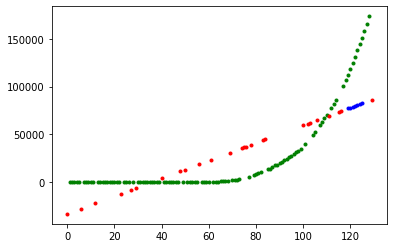

In [0]:
plt.scatter(X_train['Date'], Y_train, marker = '.', color = 'green')
plt.scatter(X_test['Date'], y_hat, marker = '.', color = 'red')
plt.scatter(forecast, prediction, marker = '.', color = 'blue')

In [0]:
dtf= pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
## group by country, sum and transpose
dtf = dtf.drop(['Province/State','Lat','Long'], axis=1).groupby("Country/Region").sum().T

## convert index to datetime
dtf.index = pd.to_datetime(dtf.index, infer_datetime_format=True)

## create total cases column
dtf = pd.DataFrame(index=dtf.index, data=dtf["India"].values, columns=["total"])

## create new cases column
dtf["new"] = dtf["total"] - dtf["total"].shift(1)
dtf["new"] = dtf["new"].fillna(method='bfill')
dtf


,total,new
2020-01-22,0,0.0
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-05-26,150793,5843.0
2020-05-27,158086,7293.0
2020-05-28,165386,7300.0
2020-05-29,173491,8105.0


## Total Cases Data

In [0]:
'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

## optimize from scipy
x = np.arange(len(dtf["total"]))
y = dtf["total"].values

logistic_model, cov = optimize.curve_fit(logistic_f,
                                xdata=x, 
                                ydata=y,p0=[1,1, 1])
# ## print the parameters
print(logistic_model)


[1.37894912e+01 1.30885148e+02 3.84036105e+05]


## Forecast

In [0]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="green")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="red")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
   
    ## focus on last
    first_idx = dtf[pd.notnull(dtf["forecast"])].index[0]
    first_loc = dtf.index.tolist().index(first_idx)
    zoom_idx = dtf.index[first_loc-zoom]
    dtf.loc[zoom_idx:]["ts"].plot(marker=".", linestyle='None', ax=ax[1], color="black", 
                                  title="Zoom on the last "+str(zoom)+" observations")
    dtf.loc[zoom_idx:]["model"].plot(ax=ax[1], color="green")
    dtf.loc[zoom_idx:]["forecast"].plot(ax=ax[1], grid=True, color="red")
    ax[1].fill_between(x=dtf.loc[zoom_idx:].index, y1=dtf.loc[zoom_idx:]['conf_int_low'], 
                       y2=dtf.loc[zoom_idx:]['conf_int_up'], color='b', alpha=0.3)
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Number of cases')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Number of cases')
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [0]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve(ts, f, model, pred_ahead=None, freq="D", zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    start = '2020-05-17'
    
    ## index
    index = pd.date_range(start=start,periods=pred_ahead,freq=freq)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

## Logistic Curve for India (Total Confirmed Cases)

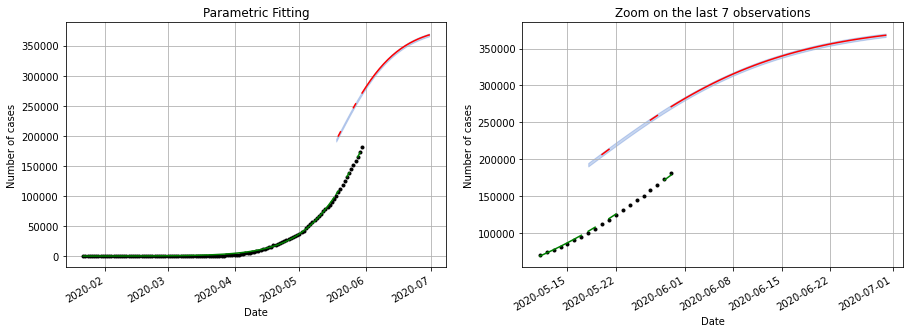

In [0]:
preds = forecast_curve(dtf["total"], logistic_f, logistic_model, 
                       pred_ahead=45, freq="D", zoom=7)

## Check accuracy of curve

In [0]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve_check(ts, f, model, pred_ahead=None, freq="D", zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    start = '2020-05-17'
    
    ## index
    index = pd.date_range(start=start,periods=pred_ahead,freq=freq)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

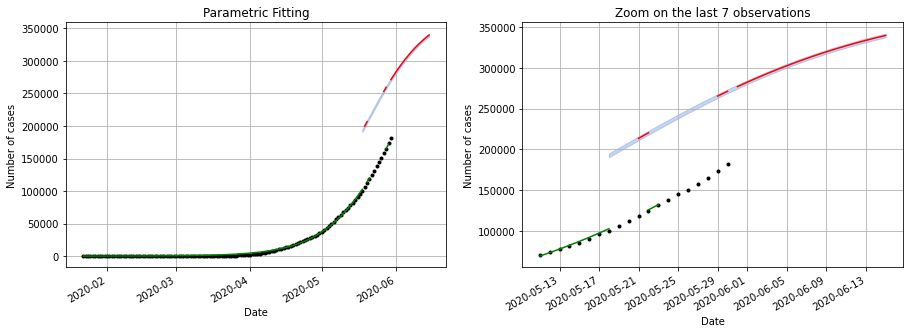

In [0]:
preds_check = forecast_curve_check(dtf["total"], logistic_f, logistic_model, 
                       pred_ahead=30, freq="D", zoom=7)

## Gaussian Curve For India ( Daily New Cases Data )

In [0]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def gaussian_f(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y


X=np.arange(len(dtf["new"]))
Y=dtf["new"].values
## optimize from scipy
gaussian_model, cov = optimize.curve_fit(gaussian_f,
                                xdata = X, 
                                ydata= Y, maxfev=10000,
                                p0=[1, 1, np.mean(dtf["new"])])
## print the parameters
gaussian_model

array([ 1.40858555e+03,  5.55807647e+06, -4.65728853e+07])

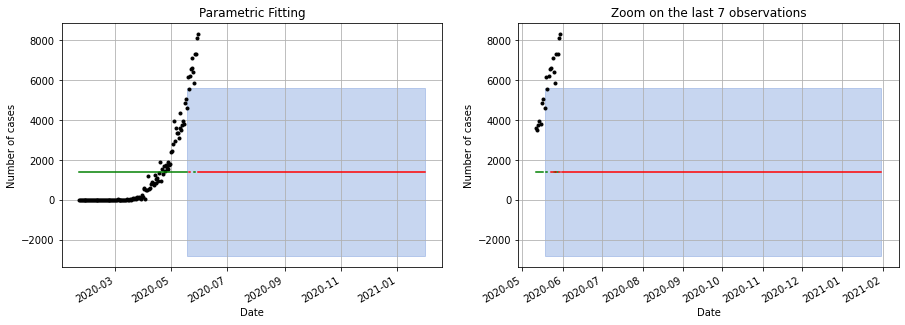

In [0]:
preds = forecast_curve(dtf["new"], gaussian_f, gaussian_model, 
                       pred_ahead=260, freq="D", zoom=7)

# Saudia Arabia

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
saudi_data = df.query('Country=="Saudi Arabia"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
saudi_data

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0.0
1,2020-01-23,0,0,0.0
2,2020-01-24,0,0,0.0
3,2020-01-25,0,0,0.0
4,2020-01-26,0,0,0.0
...,...,...,...,...
125,2020-05-26,76726,411,48450.0
126,2020-05-27,78541,425,51022.0
127,2020-05-28,80185,441,54553.0
128,2020-05-29,81766,458,57013.0


# Linear Regression

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date
%matplotlib inline
# Taken from Priya

def convert_date(cols):
  date = str(cols[0].date())
  date_format = "%Y-%m-%d"
  d0 = datetime.strptime('2020-01-22', date_format)
  d1 = datetime.strptime(date, date_format)
  delta = d1-d0
  return(delta.days)

saudi_data['Date'] = saudi_data[['Date']].apply(convert_date,axis=1)
saudi_data

,Date,Confirmed,Deaths,Recovered
0,0,0,0,0.0
1,1,0,0,0.0
2,2,0,0,0.0
3,3,0,0,0.0
4,4,0,0,0.0
...,...,...,...,...
125,125,76726,411,48450.0
126,126,78541,425,51022.0
127,127,80185,441,54553.0
128,128,81766,458,57013.0


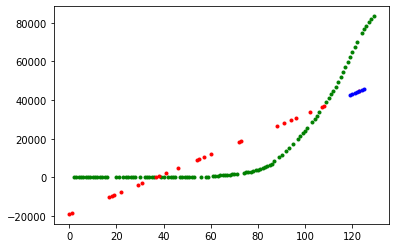

In [0]:
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(saudi_data.drop(['Confirmed','Recovered','Deaths'],axis=1), 
                                                    saudi_data['Confirmed'], test_size=0.20)
linear_model_s = LinearRegression()
linear_model_s.fit(X_train_s,Y_train_s)
y_hat_s = linear_model_s.predict(X_test_s)

forecast_s = pd.DataFrame(columns=['Date'], data=[119,120,121,122,123,124,125])
prediction_s = linear_model_s.predict(forecast_s)

plt.scatter(X_train_s['Date'], Y_train_s, marker = '.', color = 'green')
plt.scatter(X_test_s['Date'], y_hat_s, marker = '.', color = 'red')
plt.scatter(forecast_s, prediction_s, marker = '.', color = 'blue')

# Logistic Curve (Total Confirmed Cases Saudi)


In [0]:
dtf_saudi= pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
## group by country, sum and transpose
dtf_saudi = dtf_saudi.drop(['Province/State','Lat','Long'], axis=1).groupby("Country/Region").sum().T

## convert index to datetime
dtf_saudi.index = pd.to_datetime(dtf_saudi.index, infer_datetime_format=True)

## create total cases column
dtf_saudi = pd.DataFrame(index=dtf_saudi.index, data=dtf_saudi["Saudi Arabia"].values, columns=["total"])

# create new cases column
dtf_saudi["new"] = dtf_saudi["total"] - dtf_saudi["total"].shift(1)
dtf_saudi["new"] = dtf_saudi["new"].fillna(method='bfill')

x_saudi = np.arange(len(dtf_saudi["total"]))
y_saudi = dtf_saudi["total"].values

'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

logistic_model_saudi, cov_saudi = optimize.curve_fit(logistic_f,
                                xdata=x_saudi, 
                                ydata=y_saudi,p0=[1,1, 1])
# ## print the parameters
print(logistic_model_saudi)


[1.19504237e+01 1.16407533e+02 1.13048873e+05]


In [0]:
def specific_gaussian_function(model, X):
  y = model[0] * np.exp(-0.5 * ((X-model[1])/model[2])**2)
  return y

max_val = 0
max_date = 0
for x in range(500):
    y = specific_gaussian_function(gaussian_model, x)
    if (y>max_val):
      max_val = y
      max_date = x

print (max_val)
print (max_date)


1398.5921553953954
499


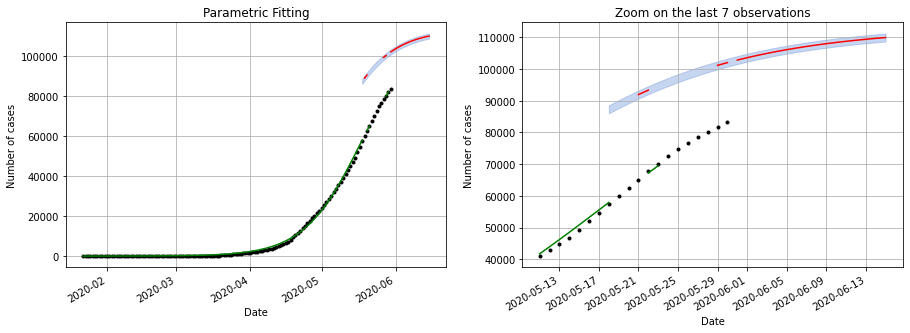

In [0]:
preds_saudi = forecast_curve(dtf_saudi["total"], logistic_f, logistic_model_saudi, 
                       pred_ahead=30, freq="D", zoom=7)

## Guassian Curve for Saudi Arabia (Daily New Cases Data)

---



In [0]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def gaussian_f(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y


X=np.arange(len(dtf_saudi["new"]))
Y=dtf_saudi["new"].values
## optimize from scipy
gaussian_model_saudi, cov_saudi = optimize.curve_fit(gaussian_f,
                                xdata = X, 
                                ydata= Y, maxfev=10000,
                                p0=[1, 1, np.mean(dtf_saudi["new"])])
## print the parameters
gaussian_model_saudi

array([2267.27503923,  117.6514254 ,  -20.176324  ])

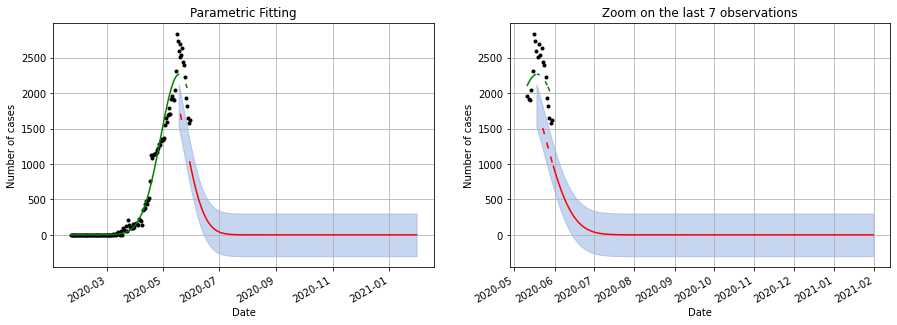

In [0]:
preds_saudi = forecast_curve(dtf_saudi["new"], gaussian_f, gaussian_model_saudi, 
                       pred_ahead=260, freq="D", zoom=7)

# South Korea

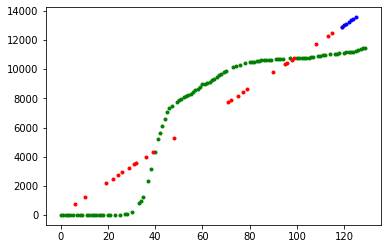

In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
korea_data = df.query('Country=="Korea, South"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

korea_data['Date'] = korea_data[['Date']].apply(convert_date,axis=1)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(korea_data.drop(['Confirmed','Recovered','Deaths'],axis=1), 
                                                    korea_data['Confirmed'], test_size=0.20)

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)
y_hat = linear_model.predict(X_test)

forecast = pd.DataFrame(columns=['Date'], data=[119,120,121,122,123,124,125])

prediction = linear_model.predict(forecast)

plt.scatter(X_train['Date'], Y_train, marker = '.', color = 'green')
plt.scatter(X_test['Date'], y_hat, marker = '.', color = 'red')
plt.scatter(forecast, prediction, marker = '.', color = 'blue')

# Logistic Curve (South Korea)

In [0]:
dtf_korea= pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
## group by country, sum and transpose
dtf_korea = dtf_korea.drop(['Province/State','Lat','Long'], axis=1).groupby("Country/Region").sum().T

## convert index to datetime
dtf_korea.index = pd.to_datetime(dtf_korea.index, infer_datetime_format=True)

## create total cases column
dtf_korea = pd.DataFrame(index=dtf_korea.index, data=dtf_korea["Korea, South"].values, columns=["total"])

# create new cases column
dtf_korea["new"] = dtf_korea["total"] - dtf_korea["total"].shift(1)
dtf_korea["new"] = dtf_korea["new"].fillna(method='bfill')

x_korea = np.arange(len(dtf_korea["total"]))
y_korea = dtf_korea["total"].values

'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

logistic_model_korea, cov_saudi = optimize.curve_fit(logistic_f,
                                xdata=x_korea, 
                                ydata=y_korea,p0=[1,1, 1])
# ## print the parameters
print(logistic_model_korea)


[6.49077203e+00 4.37752347e+01 1.06424796e+04]


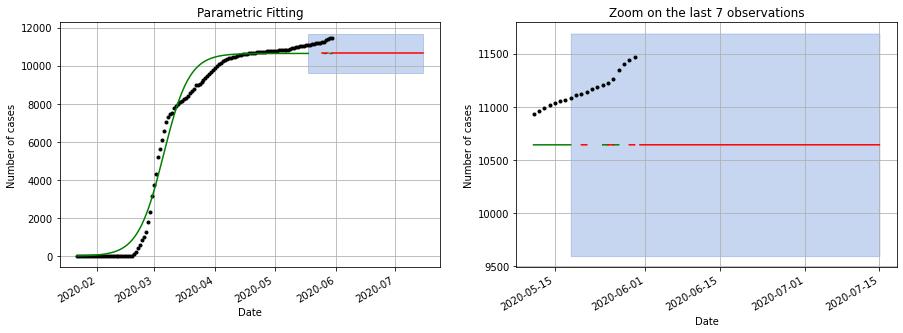

In [0]:
preds_korea= forecast_curve(dtf_korea["total"], logistic_f, logistic_model_korea, 
                       pred_ahead=60, freq="D", zoom=7)

## Guassian Curve for South Korea (Daily New Cases Data)

In [0]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def gaussian_f(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y


X=np.arange(len(dtf_korea["new"]))
Y=dtf_korea["new"].values
## optimize from scipy
gaussian_model_korea, cov_korea = optimize.curve_fit(gaussian_f,
                                xdata = X, 
                                ydata= Y, maxfev=10000,
                                p0=[1, 1, np.mean(dtf_korea["new"])])
## print the parameters
gaussian_model_korea

array([666.39473851,  39.96047632,  -4.76498218])

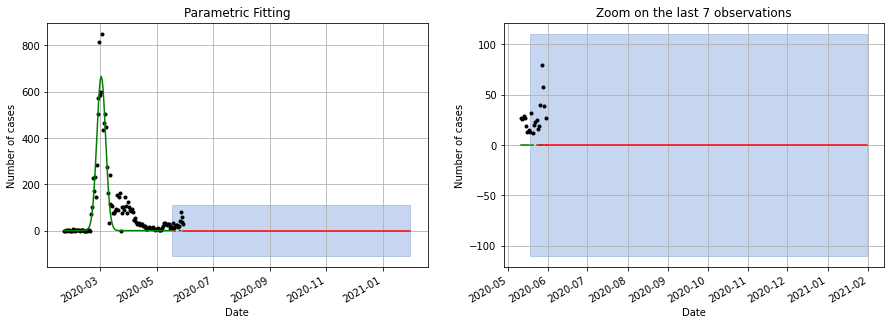

In [0]:
preds_korea = forecast_curve(dtf_korea["new"], gaussian_f, gaussian_model_korea, 
                       pred_ahead=260, freq="D", zoom=7)

# US

In [0]:
dtf_us= pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
## group by country, sum and transpose
dtf_us = dtf_us.drop(['Province/State','Lat','Long'], axis=1).groupby("Country/Region").sum().T

## convert index to datetime
dtf_us.index = pd.to_datetime(dtf_us.index, infer_datetime_format=True)

## create total cases column
dtf_us = pd.DataFrame(index=dtf_us.index, data=dtf_us["US"].values, columns=["total"])

# create new cases column
dtf_us["new"] = dtf_us["total"] - dtf_us["total"].shift(1)
dtf_us["new"] = dtf_us["new"].fillna(method='bfill')
x_us = np.arange(len(dtf_us["total"]))
y_us = dtf_us["total"].values

'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

logistic_model_us, cov_us = optimize.curve_fit(logistic_f,
                                xdata=x_us, 
                                ydata=y_us,p0=[1,1, 1])
# ## print the parameters
print(logistic_model_us)


[1.23205037e+01 9.27840901e+01 1.75197083e+06]


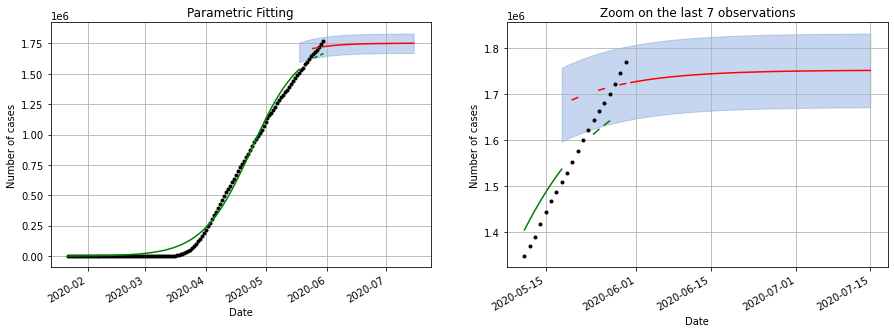

In [0]:
preds_us= forecast_curve(dtf_us["total"], logistic_f, logistic_model_us, 
                       pred_ahead=60, freq="D", zoom=7)

In [0]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def gaussian_f(X, a, b, c):
    y = a * np.exp(-0.5 * ((X-b)/c)**2)
    return y


X=np.arange(len(dtf_us["new"]))
Y=dtf_us["new"].values
## optimize from scipy
gaussian_model_us, cov_us = optimize.curve_fit(gaussian_f,
                                xdata = X, 
                                ydata= Y, maxfev=10000,
                                p0=[1, 1, np.mean(dtf_us["new"])])
## print the parameters
gaussian_model_us

array([1.45103780e+04, 1.78778263e+10, 5.01361709e+10])

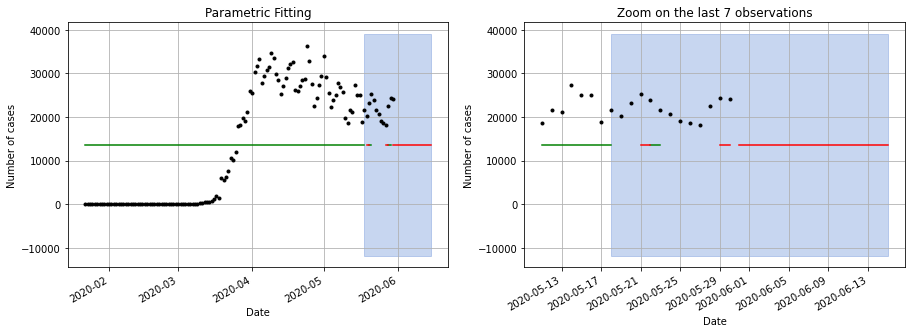

In [0]:
preds_us= forecast_curve(dtf_us["new"], gaussian_f, gaussian_model_us, 
                       pred_ahead=30, freq="D", zoom=7)

# Resources

- https://medium.com/analytics-vidhya/how-to-predict-when-the-covid-19-pandemic-will-stop-in-your-country-with-python-d6fbb2425a9f
- https://www.youtube.com/watch?v=_Hi6_JQesSQ
- https://drive.google.com/drive/folders/18fhKrW2vIqeNpJvAMKOQ2G9b9R_UHlSp
- https://github.com/CSSEGISandData/COVID-19